In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [423]:
train = pd.read_parquet('train.parquet', engine='pyarrow')
test = pd.read_parquet('test.parquet', engine='pyarrow')

# Exploratory Data Analysis

In [424]:
train.head(10)

,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,survived,ticket
199,-1,C,-1,Unknown,0,15.245800,Unknown,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,2661
706,12,C,-1,Unknown,0,11.241700,Unknown,"Nicola-Yarred, Master. Elias",0,2,0,1,1,2651
555,18,Unknown,-1,Unknown,2,13.000000,"Kontiolahti, Finland / Detroit, MI","Hiltunen, Miss. Marta",1,1,1,1,0,250650
382,37,Unknown,-1,Unknown,2,9.587500,Unknown,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,4135
316,41,Unknown,-1,Unknown,2,39.687500,Unknown,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,3101295
1165,55,Unknown,201,Unknown,2,8.050000,Unknown,"Meo, Mr. Alfonzo",0,2,0,0,0,A.5. 11206
754,32,D,-1,Unknown,2,15.850000,"Ruotsinphytaa, Finland New York, NY","Backstrom, Mr. Karl Alfred",0,2,0,1,0,3101278
1030,43,Unknown,-1,Unknown,2,6.450000,Unknown,"Holm, Mr. John Fredrik Alexander",0,2,0,0,0,C 7075
715,50,4,-1,C80,0,211.500000,"Elkins Park, PA","Widener, Mrs. George Dunton (Eleanor Elkins)",1,0,1,1,1,113503
56,52,4,-1,D20,0,78.266701,"Haverford, PA","Stephenson, Mrs. Walter Bertram (Martha Eustis)",0,0,1,1,1,36947


In [425]:
print('Train set: {} observations, {} features\n'.format(train.shape[0],train.shape[1]))
print('Test set: {} observations, {} features'.format(test.shape[0],test.shape[1]))

Train set: 1047 observations, 14 features

Test set: 262 observations, 14 features


In [426]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 199 to 225
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1047 non-null   int64  
 1   boat       1047 non-null   object 
 2   body       1047 non-null   int32  
 3   cabin      1047 non-null   object 
 4   embarked   1047 non-null   int64  
 5   fare       1047 non-null   float32
 6   home.dest  1047 non-null   object 
 7   name       1047 non-null   object 
 8   parch      1047 non-null   int32  
 9   pclass     1047 non-null   int64  
 10  sex        1047 non-null   int64  
 11  sibsp      1047 non-null   int32  
 12  survived   1047 non-null   int64  
 13  ticket     1047 non-null   object 
dtypes: float32(1), int32(3), int64(5), object(5)
memory usage: 106.3+ KB


In [427]:
train.isna().sum()

age          0
boat         0
body         0
cabin        0
embarked     0
fare         0
home.dest    0
name         0
parch        0
pclass       0
sex          0
sibsp        0
survived     0
ticket       0
dtype: int64

**Lets take a look first on categorical variables.**

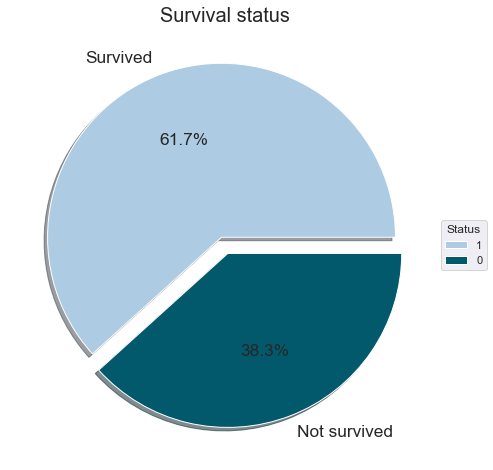

In [428]:
plt.rcParams['figure.figsize'] = [8, 8]
values= train['survived'].value_counts() / train.shape[0]
labels=['Survived', 'Not survived']
plt.pie(values,labels=labels, 
               explode=[0.05, 0.05], 
               colors = ['#adcbe3','#03596c'], 
               autopct='%.1f%%',  
               shadow=True,
               textprops={'size': 'x-large'})
plt.title('Survival status',fontdict = {'fontsize' : 20})
plt.legend(train['survived'].unique(),title='Status',loc='center',bbox_to_anchor=(0.8,0,0.5,1))
plt.show()

***This function will check if the name of a passanger contain one of the given titles in a list of titles.
If a name contain one of the women or men titles it will be replaced by value "Female"/"Male" respectively. This is the way to discover who is represented by 1 and who is by 0.***

In [429]:
male_titles  = ['Master', 'Mr.', 'Rev.', 'Col.', 'Don.', 'Sir.', 'Capt.', 'Dr.']
female_titles = ['Miss.', 'Mrs.', 'Ms.', 'Mme.', 'Mlle.', 'Countess']

def replace_if_contain(dataset, column, values, value_to_replace):    
    new_col='_'+column+'_'
    for i in range(len(values)):       
        dataset.loc[(dataset[column].str.contains(values[i],regex=False)), new_col]=value_to_replace
    

replace_if_contain(train, 'name', male_titles, 'Male')
replace_if_contain(train, 'name', female_titles, 'Female') 

train.rename(columns = {'_name_':'_sex_'}, inplace = True)    
train.head(10)


,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,survived,ticket,_sex_
199,-1,C,-1,Unknown,0,15.245800,Unknown,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,2661,Male
706,12,C,-1,Unknown,0,11.241700,Unknown,"Nicola-Yarred, Master. Elias",0,2,0,1,1,2651,Male
555,18,Unknown,-1,Unknown,2,13.000000,"Kontiolahti, Finland / Detroit, MI","Hiltunen, Miss. Marta",1,1,1,1,0,250650,Female
382,37,Unknown,-1,Unknown,2,9.587500,Unknown,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,4135,Female
316,41,Unknown,-1,Unknown,2,39.687500,Unknown,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,3101295,Female
1165,55,Unknown,201,Unknown,2,8.050000,Unknown,"Meo, Mr. Alfonzo",0,2,0,0,0,A.5. 11206,Male
754,32,D,-1,Unknown,2,15.850000,"Ruotsinphytaa, Finland New York, NY","Backstrom, Mr. Karl Alfred",0,2,0,1,0,3101278,Male
1030,43,Unknown,-1,Unknown,2,6.450000,Unknown,"Holm, Mr. John Fredrik Alexander",0,2,0,0,0,C 7075,Male
715,50,4,-1,C80,0,211.500000,"Elkins Park, PA","Widener, Mrs. George Dunton (Eleanor Elkins)",1,0,1,1,1,113503,Female
56,52,4,-1,D20,0,78.266701,"Haverford, PA","Stephenson, Mrs. Walter Bertram (Martha Eustis)",0,0,1,1,1,36947,Female


***From the above, seems like a value 0 in column "sex" is a man and value 1 is a women.***

In [430]:
print('Distribution of Varibale "Sex" before: ')   
print(train['sex'].value_counts())
print()
print('Distribution of Varibale "Sex" after: ')   
print(train['_sex_'].value_counts())
print()

Distribution of Varibale "Sex" before: 
0    677
1    370
Name: sex, dtype: int64

Distribution of Varibale "Sex" after: 
Male      678
Female    369
Name: _sex_, dtype: int64



***New column creation***

In [431]:
train.loc[train['sex']==1, '_sex_']='Female'
train.loc[train['sex']==0, '_sex_']='Male'

In [432]:
train.head()

,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,survived,ticket,_sex_
199,-1,C,-1,Unknown,0,15.2458,Unknown,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,2661,Male
706,12,C,-1,Unknown,0,11.2417,Unknown,"Nicola-Yarred, Master. Elias",0,2,0,1,1,2651,Male
555,18,Unknown,-1,Unknown,2,13.0000,"Kontiolahti, Finland / Detroit, MI","Hiltunen, Miss. Marta",1,1,1,1,0,250650,Female
382,37,Unknown,-1,Unknown,2,9.5875,Unknown,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,4135,Female
316,41,Unknown,-1,Unknown,2,39.6875,Unknown,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,3101295,Female


***Seems like a Male are less likely survived, as I can see from the plot below.***

0    646
1    401
Name: survived, dtype: int64

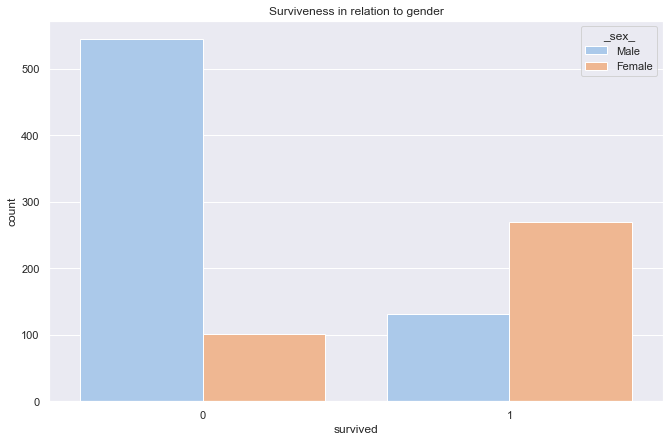

In [433]:
sns.set(rc={"figure.figsize":(11, 7)})
sns.countplot(data=train, x='survived', hue = '_sex_',  palette='pastel').set(title='Surviveness in relation to gender')
train['survived'].value_counts()

In [434]:
def missing_pct_calc(data, variable):        
    missing_pct = data[data[variable]=='Unknown'][variable].count() / data.shape[0] * 100
    print('The variable "{}" have {}% of missing values.\n'.format(variable, round(missing_pct,2)))


categorical_vars = ['boat', 'cabin', 'home.dest']
for i in range(len(categorical_vars)):
    missing_pct_calc(train, categorical_vars[i])


The variable "boat" have 62.56% of missing values.

The variable "cabin" have 78.32% of missing values.

The variable "home.dest" have 42.31% of missing values.



***The features 'boat' and 'body' are looks like a target leakage. I'm not sure these feature will be availible in real world data.***

***Using these features will cause to overestimate model performance on a training dataset.***

**I will drop these features from a train data, because of their strong correlation with a target variable.***


In [435]:
check= train.copy()
check.loc[check['boat']!='Unknown', 'boat'] = 1
check.loc[train['boat']=='Unknown', 'boat'] = 0
check['boat']=pd.to_numeric(check['boat'])
check[['boat', 'survived']].corr()

,boat,survived
boat,1.000000,0.949421
survived,0.949421,1.000000


***The column "boat" have a strong correlation with the label ("survived"). It make a sense since someone who have got into the boat most likely have survived.***

***I will drop columns like "cabin" and "ticket" which represent some Id number of a cabin in Titanic and ticket number, also I will drop "home.dest" column which represent 
the destination port of each pasanger. This three columns are useless from  surviveness prediction perspective.***

***The column "body" is also fully correlated with the label ("survived"), as I can see from below check, where the column "body" is not missing (meens that the body was found I assume), there are only unsurvived pasangers. Which is obvious because if the body has been found , there are no chanses that the passanger is survived. These column looks like a target leakage which lead to a model overestimation.*** 


In [436]:
train[train['body']!=-1]['survived'].value_counts()

0    94
Name: survived, dtype: int64

In [437]:
train = train.drop(['ticket'], axis=1)
train = train.drop(['cabin'], axis=1)
train = train.drop(['home.dest'], axis=1)

train = train.drop(['boat'], axis=1)
train = train.drop(['body'], axis=1)

In [438]:
train.head(10)

,age,embarked,fare,name,parch,pclass,sex,sibsp,survived,_sex_
199,-1,0,15.245800,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,Male
706,12,0,11.241700,"Nicola-Yarred, Master. Elias",0,2,0,1,1,Male
555,18,2,13.000000,"Hiltunen, Miss. Marta",1,1,1,1,0,Female
382,37,2,9.587500,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,Female
316,41,2,39.687500,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,Female
1165,55,2,8.050000,"Meo, Mr. Alfonzo",0,2,0,0,0,Male
754,32,2,15.850000,"Backstrom, Mr. Karl Alfred",0,2,0,1,0,Male
1030,43,2,6.450000,"Holm, Mr. John Fredrik Alexander",0,2,0,0,0,Male
715,50,0,211.500000,"Widener, Mrs. George Dunton (Eleanor Elkins)",1,0,1,1,1,Female
56,52,0,78.266701,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",0,0,1,1,1,Female


# Feature Transformation

In [439]:
train2= train.copy()
p_class = sorted(list(train2['pclass'].value_counts().index))

for i in range(len(p_class)):
    male_median=train2[(train2['_sex_']=='Male') & (train2['pclass']==p_class[i])]['age'].median()
    female_median=train2[(train2['_sex_']=='Female') & (train2['pclass']==p_class[i])]['age'].median()   
    print('For pclass {pclass} the median age of female is {f_age} and the median age of male is {m_age}'
           .format(pclass=p_class[i], f_age=female_median, m_age=male_median))
      

For pclass 0 the median age of female is 33.0 and the median age of male is 38.0
For pclass 1 the median age of female is 26.0 and the median age of male is 28.0
For pclass 2 the median age of female is 16.0 and the median age of male is 21.0


<AxesSubplot:>

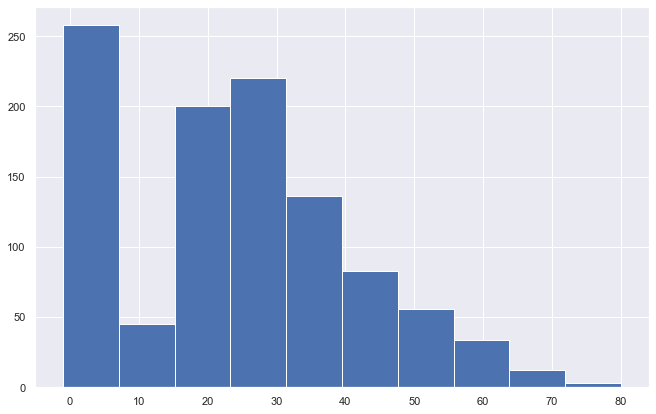

In [440]:
sns.set(rc={"figure.figsize":(11, 7)})
train['age'].hist()

In [441]:
train2.groupby(["_sex_", "survived", "pclass",])["age"].median()

_sex_   survived  pclass
Female  0         0         25.0
                  1         26.5
                  2         18.0
        1         0         33.0
                  1         25.5
                  2         15.0
Male    0         0         39.0
                  1         29.0
                  2         21.0
        1         0         35.5
                  1          5.5
                  2         21.0
Name: age, dtype: float64

***Looks like there are a lot of missing values (-1) in the "age" variable. I will impute the values of age according to passangers gender, survived status and psclas. For example: for passanger who's gender is female, pclass equal to 0, and she's not survived, the value of 25 will be populated. I can't just impute a median age to every passanger who's age is missing, because the median age is too much diferent in each group of passangers. The goal is to bring the "age" distribution to some kind of normality.***

### Imputer

In [442]:
train['_age_'] = train['age']

train.loc[(train['age']==-1) & (train['_sex_']=='Female') & (train['survived']==0) & (train['pclass']==0), '_age_'] =25.0
train.loc[(train['age']==-1) & (train['_sex_']=='Female') & (train['survived']==0) & (train['pclass']==1), '_age_'] =26.5
train.loc[(train['age']==-1) & (train['_sex_']=='Female') & (train['survived']==0) & (train['pclass']==2), '_age_'] =18.0
train.loc[(train['age']==-1) & (train['_sex_']=='Female') & (train['survived']==1) & (train['pclass']==0), '_age_'] =33.0
train.loc[(train['age']==-1) & (train['_sex_']=='Female') & (train['survived']==1) & (train['pclass']==1), '_age_'] =25.5
train.loc[(train['age']==-1) & (train['_sex_']=='Female') & (train['survived']==1) & (train['pclass']==2), '_age_'] =15.0


train.loc[(train['age']==-1) & (train['_sex_']=='Male') & (train['survived']==0) & (train['pclass']==0), '_age_'] =39.0
train.loc[(train['age']==-1) & (train['_sex_']=='Male') & (train['survived']==0) & (train['pclass']==1), '_age_'] =29.0
train.loc[(train['age']==-1) & (train['_sex_']=='Male') & (train['survived']==0) & (train['pclass']==2), '_age_'] =21.0
train.loc[(train['age']==-1) & (train['_sex_']=='Male') & (train['survived']==1) & (train['pclass']==0), '_age_'] =35.5
train.loc[(train['age']==-1) & (train['_sex_']=='Male') & (train['survived']==1) & (train['pclass']==1), '_age_'] =5.5
train.loc[(train['age']==-1) & (train['_sex_']=='Male') & (train['survived']==1) & (train['pclass']==2), '_age_'] =21.0

train = train.drop(['age'], axis=1)

***Distribution of "age" after handling missing values***

<AxesSubplot:>

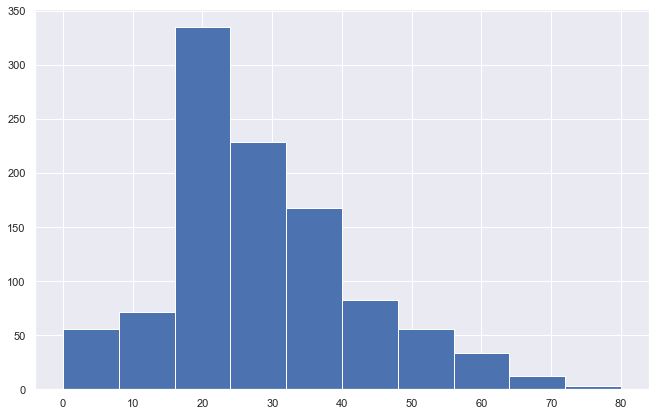

In [443]:
train['_age_'].hist()

0    646
1    401
Name: survived, dtype: int64

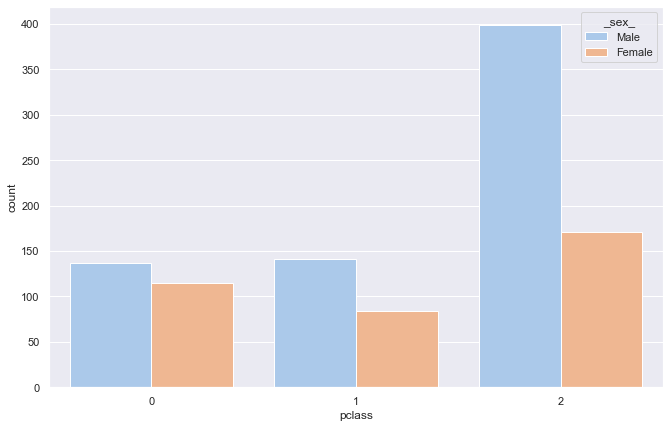

In [444]:
sns.countplot(data=train, x='pclass', hue = '_sex_',  palette='pastel')
train['survived'].value_counts()

<AxesSubplot:xlabel='fare', ylabel='Count'>

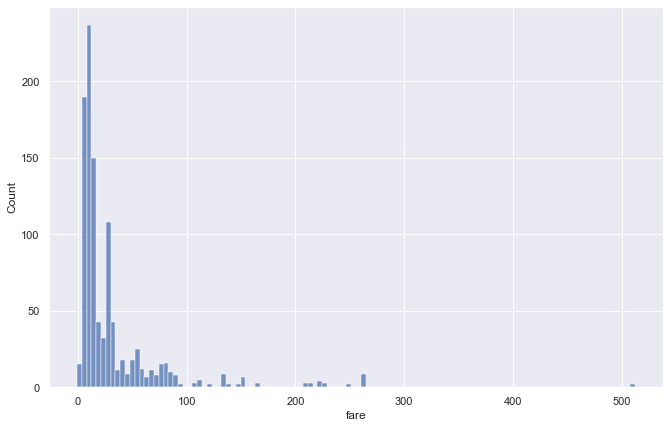

In [445]:
sns.histplot(data=train, x="fare")

# Feature engineering

***I create a few new features, based on features that are currently exists, in order to expand their informativity. First of all I want to create feature that represent a social class, based on "fare" column. Someone who can afford to pay a fare price higher then 80% of people (decile 9 and 10) will be called "Rich". Passangers who paid fare in interval between procentile 40 and 80 will be called "Middle class", all others will be called "Poor".***


***Also I want to know the social group of each passanger (Yound man, Child, Teenager etc).I already found the true values of gender and also the age column was imputed, I think this new column will make more sense.***


***One more feature I'm going to implement is an indicator of a big family. Passanger who have more than 6 family members on Titanic will be considered as someone who have a big family and value of 1 will be populated. Othervise 0 will be populated. Total count of family members calculated as following: parch + sibsp***

In [446]:
def create_new_features(dataset):
      
    dataset['_decile_of_fare_']= pd.qcut(dataset['fare'], q = 10, labels = False)
    dataset.loc[(dataset['_decile_of_fare_']>=8), '_social_class_'] ="Rich"
    dataset.loc[(dataset['_decile_of_fare_']>=4) & (dataset['_decile_of_fare_']< 8), '_social_class_'] ="Middle class"
    dataset.loc[(dataset['_decile_of_fare_']< 4), '_social_class_'] ="Poor"

    dataset.loc[(dataset['_age_']<= 4), '_group_'] ="Child"
    dataset.loc[(dataset['_age_']>  4) & (dataset['_age_']<= 13) & (dataset['_sex_']=='Male'),'_group_'] ="Boy"
    dataset.loc[(dataset['_age_']>  4) & (dataset['_age_']<= 13) & (dataset['_sex_']=='Female'),'_group_'] ="Girl"
    dataset.loc[(dataset['_age_']> 13) & (dataset['_age_']<= 18),'_group_'] ="Teenager"
    dataset.loc[(dataset['_age_']> 18) & (dataset['_age_']<= 30) & (dataset['_sex_']=='Male'),'_group_'] ="Young Man"
    dataset.loc[(dataset['_age_']> 18) & (dataset['_age_']<= 30) & (dataset['_sex_']=='Female'),'_group_'] ="Young Women"
    dataset.loc[(dataset['_age_']> 30) & (dataset['_age_']<= 55) & (dataset['_sex_']=='Male'),'_group_'] ="Man"
    dataset.loc[(dataset['_age_']> 30) & (dataset['_age_']<= 55) & (dataset['_sex_']=='Female'),'_group_'] ="Women"
    dataset.loc[(dataset['_age_']> 55) & (dataset['_sex_']=='Male'),'_group_'] ="Old Man"
    dataset.loc[(dataset['_age_']> 55) & (dataset['_sex_']=='Female'),'_group_'] ="Old Women"


    dataset['_family_members_total_']= dataset['parch']+dataset['sibsp']
    dataset.loc[(dataset['_family_members_total_'] >6) ,'_big_family_'] = 1
    dataset.loc[(dataset['_family_members_total_']<=6) ,'_big_family_'] = 0

    return dataset



train = create_new_features(train)
train

,embarked,fare,name,parch,pclass,sex,sibsp,survived,_sex_,_age_,_decile_of_fare_,_social_class_,_group_,_family_members_total_,_big_family_
199,0,15.2458,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,Male,21.0,5,Middle class,Young Man,2,0.0
706,0,11.2417,"Nicola-Yarred, Master. Elias",0,2,0,1,1,Male,12.0,4,Middle class,Boy,1,0.0
555,2,13.0000,"Hiltunen, Miss. Marta",1,1,1,1,0,Female,18.0,4,Middle class,Teenager,2,0.0
382,2,9.5875,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,Female,37.0,3,Poor,Women,0,0.0
316,2,39.6875,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,Female,41.0,7,Middle class,Women,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,2,10.5000,"Ridsdale, Miss. Lucy",0,1,1,0,1,Female,50.0,3,Poor,Women,0,0.0
283,2,22.0250,"Kink-Heilmann, Miss. Luise Gretchen",2,2,1,0,1,Female,4.0,6,Middle class,Child,2,0.0
797,2,10.5000,"Jenkin, Mr. Stephen Curnow",0,1,0,0,0,Male,32.0,3,Poor,Man,0,0.0
1300,2,11.5000,"Cotterill, Mr. Henry 'Harry'",0,1,0,0,0,Male,21.0,4,Middle class,Young Man,0,0.0


0.0    1032
1.0      15
Name: _big_family_, dtype: int64

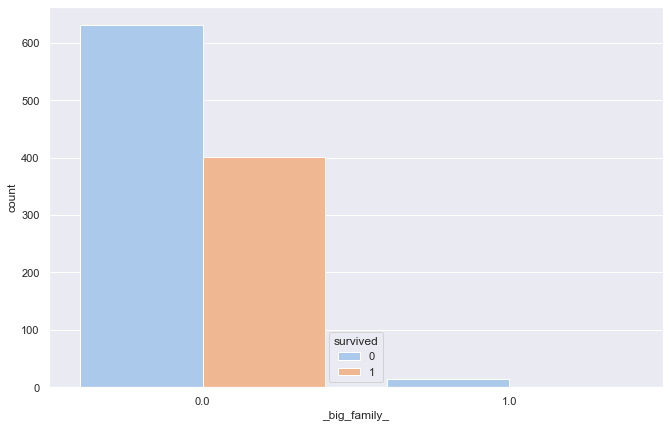

In [447]:
sns.countplot(data=train, x='_big_family_', hue = 'survived',  palette='pastel')
train['_big_family_'].value_counts()

# Preproceccing

***One Hot Encoding:***

In [448]:
from sklearn.preprocessing import OneHotEncoder

categorical_variables = ['_group_', '_social_class_']

train = train.reset_index()

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on categorical variables  
encoder_df = pd.DataFrame(encoder.fit_transform(train[categorical_variables]).toarray(), 
                          columns=list(train['_group_'].unique())+list(train['_social_class_'].unique()))

#merge one-hot encoded columns back with original DataFrame
train = train.join(encoder_df)

#view final df
train.head()



,index,embarked,fare,name,parch,pclass,sex,sibsp,survived,_sex_,...,Women,Man,Young Women,Child,Old Women,Old Man,Girl,Middle class,Poor,Rich
0,199,0,15.2458,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,706,0,11.2417,"Nicola-Yarred, Master. Elias",0,2,0,1,1,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,555,2,13.0000,"Hiltunen, Miss. Marta",1,1,1,1,0,Female,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,382,2,9.5875,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,Female,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,316,2,39.6875,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,Female,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


***Scaling:***

In [449]:
from sklearn.preprocessing import MinMaxScaler

# apply min-max scaling
minmax_scaler = MinMaxScaler(feature_range=(0, 1))

train['_fare_'] = minmax_scaler.fit_transform(train[['fare']])
train['_age_'] = minmax_scaler.fit_transform(train[['_age_']])

train = train.drop(['fare'], axis=1)

train.head()

,index,embarked,name,parch,pclass,sex,sibsp,survived,_sex_,_age_,...,Man,Young Women,Child,Old Women,Old Man,Girl,Middle class,Poor,Rich,_fare_
0,199,0,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,Male,0.2625,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.031648
1,706,0,"Nicola-Yarred, Master. Elias",0,2,0,1,1,Male,0.1500,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.023848
2,555,2,"Hiltunen, Miss. Marta",1,1,1,1,0,Female,0.2250,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.027273
3,382,2,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,Female,0.4625,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.020625
4,316,2,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,Female,0.5125,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.079262


***Last preparation before modeling. Droping not encoded and character variables.***

In [450]:
train=train.drop(['index', 'name', '_sex_', '_social_class_', '_group_'], axis=1)

***Order a columns alphabetically for a Random Forest model validation.***

In [451]:
def order_columns(dataset):  
    dataset=dataset[sorted(list(dataset.columns.values), reverse=True)]  
    return dataset


train = order_columns(train)
train

,survived,sibsp,sex,pclass,parch,embarked,_fare_,_family_members_total_,_decile_of_fare_,_big_family_,...,Teenager,Rich,Poor,Old Women,Old Man,Middle class,Man,Girl,Child,Boy
0,1,1,0,2,1,0,0.031648,2,5,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,1,0,2,0,0,0.023848,1,4,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,2,0.027273,2,4,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,0,1,2,0,2,0.020625,0,3,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,2,5,2,0.079262,5,7,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,1,0,1,1,0,2,0.022403,0,3,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1043,1,0,1,2,2,2,0.044854,2,6,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1044,0,0,0,1,0,2,0.022403,0,3,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1045,0,0,0,1,0,2,0.024351,0,4,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


# Modeling

In [452]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance



predictors = train.select_dtypes(include=np.number).drop(['survived'], axis=1)
predictors = list(predictors.columns)

label = train.survived

X = pd.DataFrame(train, columns=predictors)
y = label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)


rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([2.28225707e-02, 2.78939006e-01, 1.17532433e-01, 1.38004945e-02,
       2.72248297e-02, 1.69581798e-01, 2.87605876e-02, 3.02035090e-02,
       1.40842588e-04, 2.61913488e-01, 3.53992272e-03, 1.63950106e-03,
       5.60718888e-03, 1.59946240e-03, 2.37715334e-03, 3.35037499e-03,
       9.17372633e-04, 7.49940735e-03, 7.70840454e-03, 9.65034838e-04,
       4.87854378e-03, 7.98831239e-03, 1.00976214e-03])

***Importance of features by RandomForest regressor.***

<BarContainer object of 23 artists>

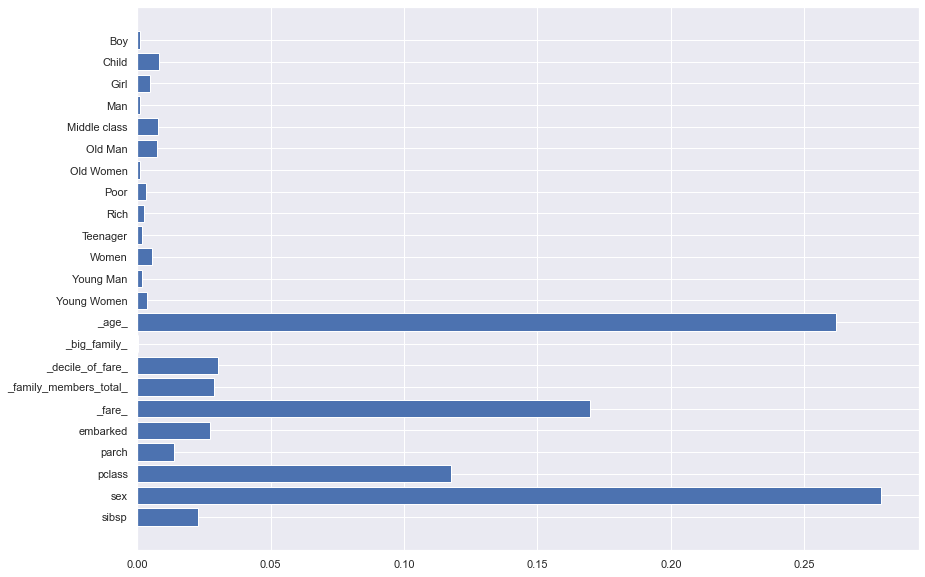

In [453]:
plt.rcParams.update({'figure.figsize': (14.0, 10.0)})
plt.rcParams.update({'font.size': 14})
plt.barh(predictors, rf.feature_importances_)

### Classifiers

***Random Forest***

Accuracy: 0.810
Precision Score : 0.875
Recall Score : 0.598
F1 Score : 0.710
Confusion Matrix : 
[[121   7]
 [ 33  49]]


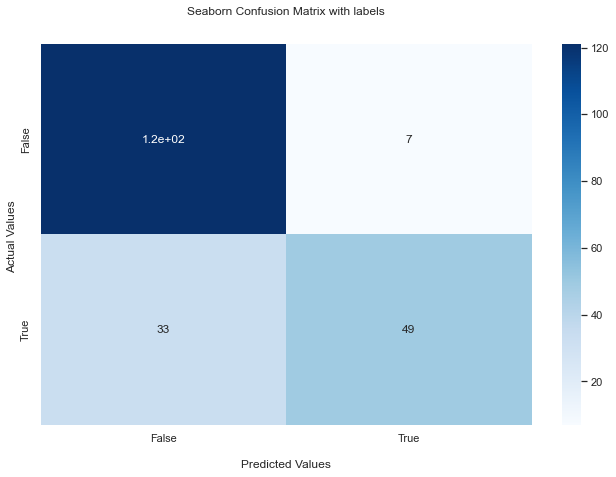

In [454]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=1000,
                                 max_depth=5,
                                 random_state=1,
                                 n_jobs=5)

# Fit the model
forest.fit(X_train, y_train)


# Measure model performance
y_pred = forest.predict(X_test)
forest_accuracy=accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision Score : %.3f' % precision_score(y_test,y_pred))
print('Recall Score : %.3f' % recall_score(y_test,y_pred))
print('F1 Score : %.3f' % f1_score(y_test,y_pred))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))


cf_matrix=confusion_matrix(y_test,y_pred)
sns.set(rc={"figure.figsize":(11, 7)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

***Hyperparameter tuning***

In [36]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

param_grid = {

    "bootstrap": [True],

    "max_depth": [10*i for i in range(1,11)],

    "max_features": [2, 3],

    "min_samples_leaf": [3, 4, 5],

    "min_samples_split": [8, 10, 12],

    "n_estimators": [100, 200, 300, 1000]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best Hyperparameters
grid_search.best_params_



In [404]:
best_grid = grid_search.best_estimator_

In [406]:
best_grid

RandomForestRegressor(max_depth=30, max_features=3, min_samples_leaf=3,
                      min_samples_split=8)

***Random Forest with tuned hyperparameters***

Accuracy: 0.819
Precision Score : 0.879
Recall Score : 0.622
F1 Score : 0.729
Confusion Matrix : 
[[121   7]
 [ 31  51]]


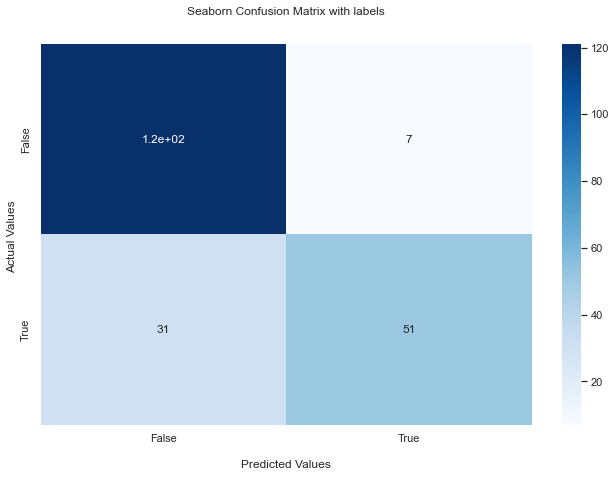

In [455]:
forest_best = RandomForestClassifier(criterion='gini',
                                     n_estimators=1000,
                                     max_depth=30,
                                     max_features=3, 
                                     min_samples_leaf=3,
                                     min_samples_split=8,
                                     random_state=1,
                                     n_jobs=1)

# Fit the model
forest_best.fit(X_train, y_train)


# Measure model performance
y_pred = forest_best.predict(X_test)

tuned_forest_accuracy=accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision Score : %.3f' % precision_score(y_test,y_pred))
print('Recall Score : %.3f' % recall_score(y_test,y_pred))
print('F1 Score : %.3f' % f1_score(y_test,y_pred))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))


cf_matrix=confusion_matrix(y_test,y_pred)
sns.set(rc={"figure.figsize":(11, 7)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

***Logistic Regression***

Accuracy: 0.819
Precision Score : 0.824
Recall Score : 0.683
F1 Score : 0.747
Confusion Matrix : 
[[116  12]
 [ 26  56]]


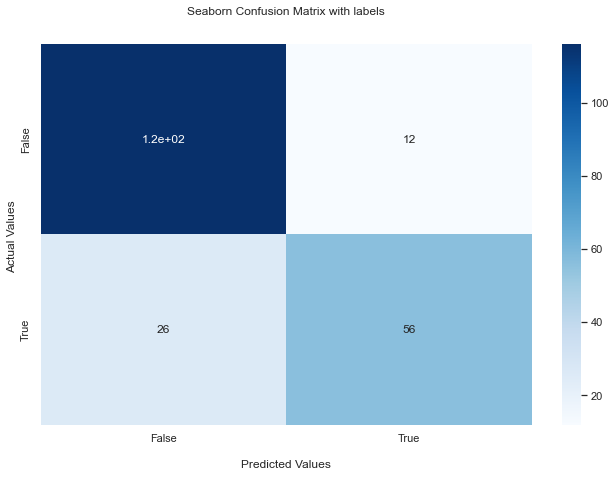

In [456]:
# train a logistic regression model 
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

y_pred = logreg.predict(X_test)

logistic_accuracy=accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision Score : %.3f' % precision_score(y_test,y_pred))
print('Recall Score : %.3f' % recall_score(y_test,y_pred))
print('F1 Score : %.3f' % f1_score(y_test,y_pred))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

cf_matrix=confusion_matrix(y_test,y_pred)
sns.set(rc={"figure.figsize":(11, 7)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

***Support vector machine***

Accuracy: 0.795
Precision Score : 0.747
Recall Score : 0.720
F1 Score : 0.733
Confusion Matrix : 
[[108  20]
 [ 23  59]]


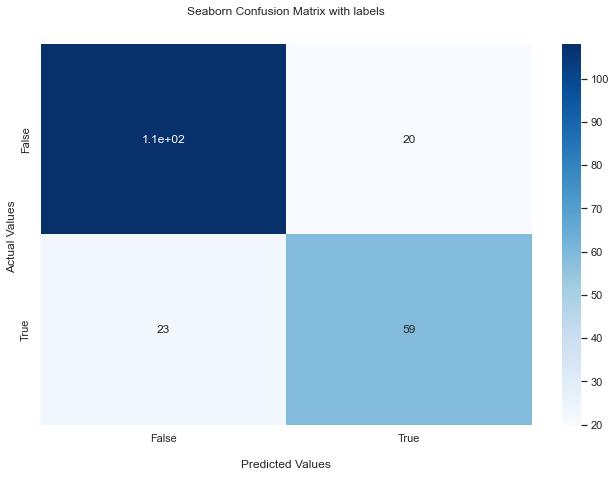

In [457]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

svm_accuracy=accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision Score : %.3f' % precision_score(y_test,y_pred))
print('Recall Score : %.3f' % recall_score(y_test,y_pred))
print('F1 Score : %.3f' % f1_score(y_test,y_pred))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))


cf_matrix=confusion_matrix(y_test,y_pred)
sns.set(rc={"figure.figsize":(11, 7)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


***KNN***

Accuracy: 0.771
Precision Score : 0.724
Recall Score : 0.671
F1 Score : 0.696
Confusion Matrix : 
[[107  21]
 [ 27  55]]


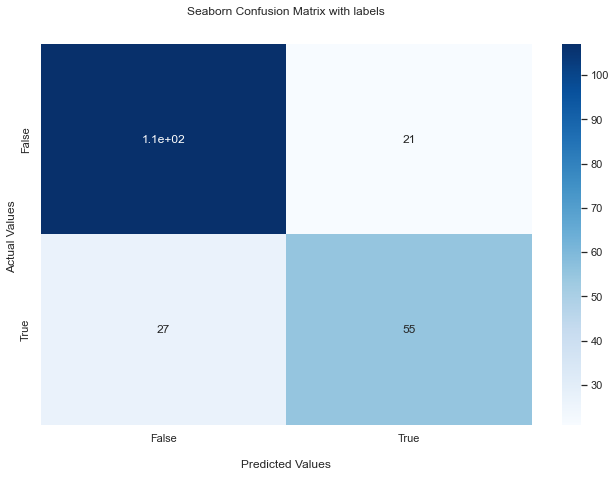

In [458]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(X_train, y_train)  
y_pred = knn.predict(X_test)  

knn_accuracy=accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision Score : %.3f' % precision_score(y_test,y_pred))
print('Recall Score : %.3f' % recall_score(y_test,y_pred))
print('F1 Score : %.3f' % f1_score(y_test,y_pred))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))


cf_matrix=confusion_matrix(y_test,y_pred)
sns.set(rc={"figure.figsize":(11, 7)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


### Model performance on train data

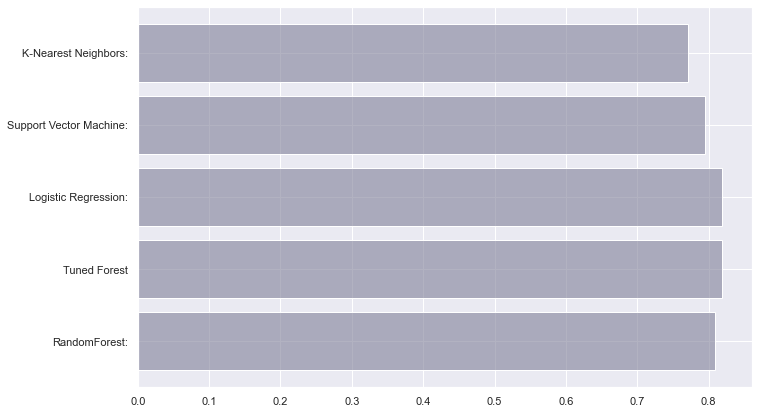

In [459]:
model_performance = { 'RandomForest:':forest_accuracy,
                      'Tuned Forest': tuned_forest_accuracy,
                      'Logistic Regression:': logistic_accuracy,
                      'Support Vector Machine:': svm_accuracy,
                      'K-Nearest Neighbors:': knn_accuracy
                    }

plt.barh(range(len(model_performance)), list(model_performance.values()), align='center', color=(0.5, 0.5, 0.6, 0.6))
plt.yticks(range(len(model_performance)), list(model_performance.keys()))
plt.show()

***Seems like Tuned Random Forest and Logistic regression shows a better performance than other classiifers. Also they have a good precision and recall scores***

**The Random Forest classifier with tuned hyperparameters predicts 87.9% of the time, a passengers survival correctly. The recall tells us that it predicted the survival of 62.2 % of the people who actually survived.**


***I will prepare the test data for the modeling throught pipline below and will check the performance of the models on it.***


***This Pipline implements all the steps above on a test data.***

### Build Pipline

In [460]:
def replace_matched_values(dataset, col, new_col, value_to_replace, new_value):
    dataset.loc[dataset[col]==value_to_replace, new_col]=new_value
    return dataset


def drop_columns(dataset, list_of_cols):
    for i in range(len(list_of_cols)):
        dataset = dataset.drop([list_of_cols[i]], axis=1)    
    return dataset


def impute_by_group(dataset, group_by, col):

    cross = pd.DataFrame(dataset.groupby(group_by)[col].median())
    new_col = '_'+col+'_'
    dataset[new_col] = dataset[col]
    for row in range(cross.shape[0]):    
        dataset.loc[(dataset[col]==-1)  
                    &(dataset[group_by[0]]==cross.index[row][0]) 
                    &(dataset[group_by[1]]==cross.index[row][1]) 
                    &(dataset[group_by[2]]==cross.index[row][2]), new_col] = cross.values[row][0]
    return dataset


def encoder(dataset, variables):
    dataset = dataset.reset_index()
    encoder = OneHotEncoder(handle_unknown='ignore')
    encoder_df = pd.DataFrame(encoder.fit_transform(dataset[variables]).toarray(), 
                              columns=list(dataset[variables[0]].unique())+list(dataset[variables[1]].unique()))
    dataset = dataset.join(encoder_df)
    return dataset


def scaler(dataset, variables):
    
    for var in variables:        
        scaled_col='_'+var+'_'
        minmax_scaler = MinMaxScaler(feature_range=(0, 1))
        dataset[scaled_col] = minmax_scaler.fit_transform(dataset[[var]])
        dataset = dataset.drop(var, axis=1)
    return dataset


In [461]:
class Pipeline:
    
    def __init__(self, dataset):
        self.dataset=dataset
    
    def pipe(self):
        self.dataset= self.dataset\
                          .pipe(replace_matched_values, col='sex', new_col='_sex_', value_to_replace=1, new_value='Female')\
                          .pipe(replace_matched_values, col='sex', new_col='_sex_', value_to_replace=0, new_value='Male')\
                          .pipe(drop_columns, list_of_cols=['cabin', 'home.dest', 'ticket', 'boat', 'body'])\
                          .pipe(impute_by_group, group_by=["_sex_", "survived", "pclass"], col='age')\
                          .pipe(drop_columns, list_of_cols=['age'])\
                          .pipe(create_new_features)\
                          .pipe(encoder, variables=['_group_', '_social_class_'])\
                          .pipe(scaler, variables=['fare'])\
                          .pipe(drop_columns, list_of_cols=['name','_sex_','_social_class_','_group_', 'index'])\
                          .pipe(order_columns)
        

        return self.dataset
    
    
    
test =  Pipeline(test).pipe()  
test 

,survived,sibsp,sex,pclass,parch,embarked,_fare_,_family_members_total_,_decile_of_fare_,_big_family_,...,Teenager,Rich,Poor,Old Women,Old Man,Middle class,Man,Girl,Child,Boy
0,0,0,0,0,0,2,0.050749,0,6,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,0,1,1,2,2,0.071731,2,7,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0,0,1,0,1,0.024106,0,4,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,3,0,0,2,2,0.513342,5,9,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,2,1,2,0.021731,2,3,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0,0,0,2,0,2,0.015713,0,2,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
258,1,2,1,0,0,2,0.100481,2,8,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259,1,0,1,0,1,0,0.483128,1,9,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260,0,0,0,2,0,2,0.015225,0,1,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Prediction on validation set

In [462]:
y_true = test['survived']

y_pred = forest.predict(test.drop('survived', axis=1))

forest_validation_accuracy=accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % accuracy_score(y_true, y_pred))
print('Precision Score : %.3f' % precision_score(y_true,y_pred))
print('Recall Score : %.3f' % recall_score(y_true,y_pred))
print('F1 Score : %.3f' % f1_score(y_true,y_pred))
print('Confusion Matrix : \n' + str(confusion_matrix(y_true,y_pred)))

Accuracy: 0.790
Precision Score : 0.824
Recall Score : 0.566
F1 Score : 0.671
Confusion Matrix : 
[[151  12]
 [ 43  56]]


In [463]:
y_pred = forest_best.predict(test.drop('survived', axis=1))

tuned_forest_validation_accuracy=accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % accuracy_score(y_true, y_pred))
print('Precision Score : %.3f' % precision_score(y_true,y_pred))
print('Recall Score : %.3f' % recall_score(y_true,y_pred))
print('F1 Score : %.3f' % f1_score(y_true,y_pred))
print('Confusion Matrix : \n' + str(confusion_matrix(y_true,y_pred)))

Accuracy: 0.813
Precision Score : 0.821
Recall Score : 0.646
F1 Score : 0.723
Confusion Matrix : 
[[149  14]
 [ 35  64]]


In [464]:
y_pred = logreg.predict(test.drop('survived', axis=1))

logistic_valigation_accuracy=accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % accuracy_score(y_true, y_pred))
print('Precision Score : %.3f' % precision_score(y_true,y_pred))
print('Recall Score : %.3f' % recall_score(y_true,y_pred))
print('F1 Score : %.3f' % f1_score(y_true,y_pred))
print('Confusion Matrix : \n' + str(confusion_matrix(y_true,y_pred)))

Accuracy: 0.622
Precision Score : 0.000
Recall Score : 0.000
F1 Score : 0.000
Confusion Matrix : 
[[163   0]
 [ 99   0]]


C:\Users\97252\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [465]:
y_pred = clf.predict(test.drop('survived', axis=1))

svm_validation_accuracy=accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % accuracy_score(y_true, y_pred))
print('Precision Score : %.3f' % precision_score(y_true,y_pred))
print('Recall Score : %.3f' % recall_score(y_true,y_pred))
print('F1 Score : %.3f' % f1_score(y_true,y_pred))
print('Confusion Matrix : \n' + str(confusion_matrix(y_true,y_pred)))

Accuracy: 0.649
Precision Score : 0.889
Recall Score : 0.081
F1 Score : 0.148
Confusion Matrix : 
[[162   1]
 [ 91   8]]


In [466]:
y_pred = knn.predict(test.drop('survived', axis=1))

knn_validation_accuracy=accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % accuracy_score(y_true, y_pred))
print('Precision Score : %.3f' % precision_score(y_true,y_pred))
print('Recall Score : %.3f' % recall_score(y_true,y_pred))
print('F1 Score : %.3f' % f1_score(y_true,y_pred))
print('Confusion Matrix : \n' + str(confusion_matrix(y_true,y_pred)))

Accuracy: 0.641
Precision Score : 0.647
Recall Score : 0.111
F1 Score : 0.190
Confusion Matrix : 
[[157   6]
 [ 88  11]]


### Model performance on validation set

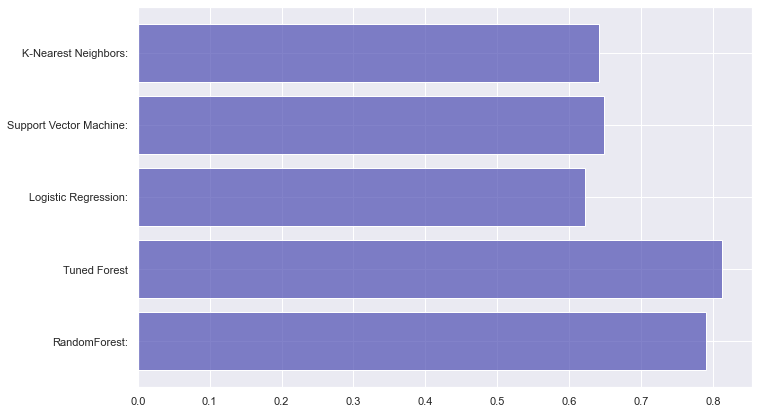

In [467]:
model_performance_on_validation = { 'RandomForest:':forest_validation_accuracy,
                                    'Tuned Forest': tuned_forest_validation_accuracy,
                                    'Logistic Regression:': logistic_valigation_accuracy,
                                    'Support Vector Machine:': svm_validation_accuracy,
                                    'K-Nearest Neighbors:': knn_validation_accuracy
                                    }

plt.barh(range(len(model_performance_on_validation)), list(model_performance_on_validation.values()), 
                                                       align='center', color=(0.3, 0.3, 0.7, 0.7))
plt.yticks(range(len(model_performance_on_validation)), list(model_performance_on_validation.keys()))
plt.show()

***Conclusion:***



***The Random Forest classifier with tuned hyperparameters by GridSearch is the best model for prediction surviveness in this dataset. As it shows a high accuracy, and also high score of precision / recall, on both train and test datasets.***